# A GNN algorithm for DNA sequencing 
## Import the important librairies

In [1]:
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import math
import pandas as pd

Inslall stellargraph (to run on google colab)

In [2]:
pip install stellargraph

     |████████████████████████████████| 440kB 22.9MB/s 


In [3]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, HinSAGE, link_classification
from stellargraph import StellarGraph

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

**Human Genome**

In [4]:
# we copied a dna sequence of the human genome
dna_sequence = "CTACTCGGGAGGCTGAGGCAGGAGAATCACTTGAACCAGGGAGTCAGAGGTTGCAGTGAGCCAAGATCGCACCACTGCACTCCAGCCTGGCAACACAGCGAGAGTCTGTCTCCAAAAAAAAAAAAAAAGGCCCAAGAGCATTTCAAACTGTTTGTTGAGAGGTAATCTTATACATTCAGTTTCTTTTGGCTTACCTGAAGAGGTGCTTGGCTATGGTTAACAAACTACGTAAGCTGGTGAAAAAACCTGTCACCTTATCCAGAGAAGCTTCTTCTTTTAGAAAATCAAGCAAAACAACTAAGCCAAGACATGTTAAAAAAAAAGTTTGAAAAGAAAGCTGTAAGGAAATACAAGGGGAGGGATTGTTAGATATGAGTTCTAAATTTCTTTTCAAAAAATCGATATGTCAGTATGTTCAATTCTTTGCCTTCTACTTTTAAACTTCCTCATAAAGCAACCTTTTTCAATTACCTGCTCCACCCTGACTCATTCTGATCACCAAAGGGGCTGATAGAAAAATAAAGAGATTTGGCCAGGTACGGTGGCTCACTCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCTGGCGGATCACCTGAGGTCGGGAGTTCGAGACCAGCCTGACCAACATGGAGAACCCCTGTCTCTACTAAAATTACAAAATTAGCCAGGCATGGTGGCACATGTCTGTAATCCCAGCTACTTGGGAGGCTGAGGCAGGAGGATCATTTGAACCAGGGAGGCAGAGGTTAAGTGGATATTCAGACCTCCTTGAGGCCTTCGTTGGAAACGGGATTTCTTCATATTCTGCTAGACAGAAGAATTCTCAGTAACTTCCTTGTGTTGTGTGTATTCAACTCAAAGAGTTCAACGATCCTTTATACAGAGCAGACTTGAAACACTCTTTTTGTGGAATTTGCAAATGGAGATCTCAGCCGCTTTGTGGTCAGTAGTAGAAAAGGAAATATCTTCGTATAAAAACTAGACAGAATGATTCTCAGATACCATGACAAAGATATTATTAGCCAATTTTTAGAGAGAAGGAAAGTAGTTAACCAAAGAAGTTAAGGCATATATCCTGGGTCACACAGCTATCAGACAGGCAGAGCCAAGGTGCACACCTGGATCTTTTTGACTCCAGAGCTGAGCTATCATCTACTACACTGTGCTCTGAGAGACAGACCATATTACAATTCCTGCAAGATCAAAACGCATGGCAGAAGAGATGCTAATGAGATTGCGCTGATCAGTACATGATTGGAAATTAGGCAGCATATCAGAATATCAAAATGAAAATTAGAAAATATTTGACCTGAATATTAATCTCCATCTGCCTGTCTATTAGAAGGATATTTTTCACTGGATTCAGGGCCCACCAGGATAATCCAGGATGATCTCCTTCCCTCAAGATCCTTGACTTAATCACATCTGCAAAGGCCCTTTTTCCAAATAAGTTAACATTTGTAGGTTCTGAGAATTGGGATCAGGCACATTTTTGAGGATCTGCACCAGTGCCCCCCACCACCACCTGCTATTCCAGGCCCCCATCCTAACACCTCCATTGCTCACACCAACAGAATTCCATTAGCAATGTGGAGAATCAGTTGAGTTTAATTATTCAAATCCAGGCATCAGGGGCTTTTAAATGAACCCATTCTTTCTTCCAGAATTCTAAAGTCACCAATATTTTAAAAATAAAAGGTCTCAGATCTCCTGGTCTCTCTTGTCAGTGGACACACTGGCATCAGCCCTGTGGGGGAGTAGGAACCGAGTCCCAAGGCCACAACCTCGCTGGGTGTCCCTGGGCAAGTCTCCTCCCCACTTTGAGCCTTAGTTTTCTGTCTGCAAAATGGGTTAAGTGTTTTCCTGGCCTCCCTCCAGGAGCTGCTGTGTGCGGGTGAAATGCAAAGACCCCTGTGAAAGCGTTGCCCACTGTGCGGCGTGCGGCACCCAGCGCGGAACCGTCCTAATGGGACGCTGAGACCCAGAGGGCGCCCAGGGTGGAAAATCCAAGAGTATGGCCTTGGCCCCTGGTGAGGGCCTTCTTGCTGTGTCATAACATGGCAGAGGGCATCTCATGTCAAGAGGGCAAGAGCAAGAGAGCCAGAGAGATAGCAAACCTGCTTCCATGGTAGCAACATTAATCCAGCCGTCATAAATTCGTTAATCCATTCATGGGGGCAGAGGGATTAGGTTTCCAACACAACTTTTGGAGGACACCTTCAAACCATAACAATGGCAGAGTCCTTGATATTAGAATATGCAGGGTTTGCAAAGCTGTAAACAAACTGGCATGTACTGTTTAGCATAAATAACTCATGTACTATTTAGAGTAAATTATTACATTTACAGAGGAAAAATTAAAATATTTATCAAAATTTTAAGGTATATATCCTTTGACCTAGAAATTCTAGTGGTAGGAATAAATCCTACACAGATAACTATACAAGTTCACTAATATAAATGTGTATAAGGATACATATACACACATGCACACACACAAACTGTTATAGTTCAATAGTGGTTAATATTTTGGGTAATATTTTGAGTAATTTTCTGCATTTCTTATATTGCTATCGTTTCATTTTATTTCCAGCAAAATGTATTGCATTAGAATGTGGGAGAATTCAACTGAGTTGCTGATTGGATTTTCAAACTCATCGCAGAAATCACACCTTTGAAAGCCAAAGCTTTCATTTGTAAAACCTAGGCTTTTTAAGAGAATAAAAGTATTCTTGAAAATCAAAAGGAAGGTACCAGTTGTGCAACAAATGAAATGTTTGTCCATAATTAGAGTAATTGTAACTTGATTTTAAACAGAGGTTTGATTGCATGGTGAGTGTCATAATGCCAAATGATTTTTCCATTGATTCAGGGCCCAGTGTATTCTTAAGTTGATGTTTGATCTCAGCATGTTTAACCTGGCCCAGAATATATCTGGCACCCTTTTGTGTGTGTGTTGTAAATGACTGTTCTTCTGTGTTACAGCTTCATACAAAATTTATTGCTTAGATTGGGGCTTCAAGTGTTGCCTTCAGGATACTGGATATTTATGATGAGTGAGCTAAAGCTTGTTTAGTGTCTATTTTGGGGCTATGGTAGGCAGATCTCTTCCCACTGGTTAGTGTTATTACAGCTGTTGTGATGATCTCATTGAATGTAGCTAAAATGGACTTTTAGTCAGCAACACTTTTAGAAGATTTAGTGTAATGAGTGAGCTTTTCGGGCTTTTGTTTTGTTTCGTTTTTTTGAATCTAGACAGAAGCCTTCTCAGAAACTTCACTGTGATGATTGCTTTCAACTCACAGAGTTGAATATTCCTTTTGATAGAGCAGTTTTGAAAGTCTCTTTTTCTAGCATCTGCAAATGGATAGGTGGAACTCTGTGAAGATTTCTTTGGAAACGGGAATATCTTCACGTAAAAAGTAAACAGAAGCATTCTGAGAAACTCCTTTGTGAGGCTTGTGTTCATCTCCCAGAGTATAACATTGCTTTTCATAGTAGACAGACTTGTTGAGTTAGATTTCACTGGGTACCATTTGCTTATAATTTTTAATCACTATTTTCCAAAGTATCTTTCTGAAATAAGCAAAGTAGTCTGCCAAGTTCCTAGCTCAAGTTAGGAGAGCAGAATATAGGTTAAAAAAATAAATTAAGTTGTGTTTATTTTGTAGTATCTAATTATATTGTATTAGCACAAGTTAGGAATACAGGAAAAGTGCTTACCTTAGAGATGATAAGACAATATATGATAACACTCCAATTTGAATTCACAACAAGTTAACTTCAATAGCAATACAAACAATCTGCTTCTATTCAGCTCCATCTCTACTTCCTTTTAAAGACTGATATTGTAAAATTATATACTTATATACTGTGTATCCAAAAACAGAAACTGATGATGTTTTATGTATTAATCTCTTAAATAATGTAGAAAACAAAATGTTGATTCACAAATGAAAGTTATAGTAATACTAGGTTTTAAACTAATGATAGTTTTTACAAGAACTCATCATTTTTTAAGGCTGCAGAGTATTCCATGGTGTATATGTGCCACATTTTCTTTTGTGTGTGTGTTTTTTTTTTTGTTTTGTTTAAGTTTTTCTTTTATTATTATACTTTAAGTTTTAGGGTACATGTGCACATTGTGCAGATTAGTTACATACGTATACATGTGCCATGCTGGTGCGCTGCACCCACTAACTCGTCATCTAGCATTAGGTATATCTCCCAATGCTATCCCTCCCCCCACACCTGCTGCAGCTTCATTTGCTTTCACACAAACCAGTACGTCGCTTTCACCTGTGACACTAGAACTTCTCCATTACTCTGGGAAATTGAATGTGTGTTGTAAAACTAGGAAAAATCCTGAGGTATATGGCAATGGAACTTCATCCATAGGCAGTGGAAGGATGGTTCTAGATTCAGCTCTAGTCTTTAGGTGCCCTGTGGCAGTGTGCAGAGGCTGTGGGTTTCTGGCCAGAGCGTGGAAGTCAGAAAGCCAAGGCAGGTAGATCACTTGAGGTCAGGAGTTCGAAACCAGCTTGGCCAACATACTGAAACCCCGTCCTTACTAAAAGTACAAAAATTAGCCAATGTGGTGATGCATGCCTGTAATCCCACCTACTCGGGACACTGAGGCAGGAGAATCGCTTGAACCAGGGTGGCGGATGTTGCAATGAGCCGAGATCATGCCACTGCACTCCAGCCTGGGTGACACAGCAAGACTCTGTCTCAAAAAAAAAAAAAAAGACCAGGAGTATAAATAAGCCCCTGCCTTCTTGACTGAAATTTTTACTGAGATAATTATAGAATAGATCTGCATACAGTTAGAAGAAATAATACATAGAGATCCCATATGCACTTTATTTATTTATTTATTTATTTATTTATTTATTTATTTAATGGGTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAGACAGAGTCTCACTCTGTCACCCAGGCTGGAGTGCAGTGGCGGGATCTCGGCTCACTGCAGCAAATAACATATTCACCTGACAGTCAGGGCTTGGACATCTTTGAGGAACAATTTTTCAGCCTATTACATTTGGCAATCTGTGTAAAAATCACACAAGAATCTATTTATGTGAAGATTTTGGATTTTAAATTAAGCAGGAAGGGAGAAATTGTATGAATTGGCCATGGGAGTGAGCTAACAGAGAAGACTGTATTTGTCAGGTTCTCCACAGAAACAGAAACAATAGGATGGAGACAGAAGAATATGGGAGAGATATTGGTCCATAAATGTCTTTGCTTGGAATGTCTTTGCCTGGATGATGCTGACTTTATACAATGAGTTGGGAAATATTCCTTCCTCTTGCATTTTCTGGACAAGATTGTGTGAAGTGACTATTATTTCTTCCTTAAATATTTGATAGAATGCCTCATATTTCTCCCTTTTATATCCAAGTCTCACCTGGGTAGGGTTGCCAGATAAAATAAAGAATTTTCAGTTAAAATTGAATTTTAGATAAACAACTAGGACTGAGTCTTCAATGTCAAGGCAAAAAGTGACTGTTTCCCTAGAAACAAATTCTGTGGGCAGACAAAGAGGAGCCATGGACTAGCTCCTCAATCACATCGCTGTCTAATGAACAAAAGAGAAGAGACTACTCATACATATAAAGCAAGTATGTGGGGGGAAGTAAAGGAGCACAGATCCGTTTGTCTATGTATCTTTCTATCATCTATCCACCTGTCTATTAGATTGTGTTAGTTTCCTATGAGTAAGGGTCCATATTAGAAAATGTACTCTAGACAATATAAATCACTATCATAAAGAATTCATGAGAATGATAACATGGCACCAGAACTGTGACAAAACACCAACAAAACAAAACAACAACAACAACAACAAAAAAAACCTACTTATCCCCAAATTTTTCTGATTTATGATAGTTATTATGAGTTTCATTTTTTAAAAATTCCCCTTCTGCTATGGCATGAATATTTGTGTCTCCCCAAAATTCATATTTTGAAGATGGTGAATGGGAGTGCAGAAGCTGCAGCTGAAGGTGCAGCAGGTGGGGAGGATCAAGGCCTGAGAGCCCTGCTGGTTTTCTCAGCAGGGAGGCTGGTAGCCTGGGGCAAGATCTCCATCTTGCTCCCAGCTGTCCGAATATACATTCAGTGCTGTTGGTAGGAAATAGAAGGAGTGAGACTGGCTTTGCTGGCTACATGGGAGCTGGGTGAGGCCTGTCACTGCCAGCTTTCCCCCACTTCCATGGTGGACATCTGAGTTTGTGTTGGGCAGCAAACATTTGTATCCTACTGAAGTTTTAAGAGAAATGTTTTTTCCTATAAATGTATATATTTCTTATTAAAAATTGTGGTTATAAATATTTCTCTCACAAAATATAATTTCTGGGTGACAAAATAAGATATTTTTCTAAATAGGAAAGATTACTTCATCATTTAAGAGTTGTAAAATTGTATAAATAATTCATAGTCTAACTAAACTAAGGACTTTTTAAAAACTACAGTATTAAAAAGTTCAGTCTTGTCTAACTCAAAGCATTAATCTAATACTTGATTTGGAACGTCCCCTCCTGTCAGCTCAGGAATGACTCAGTGTGAGGGGAAGAGAAGCTGTGAGAAGACATAGGGGAGGACTCTGTTCTGGTTTTTTATACTCCTTTCTTCTCTCCCTATCCCACCCTCAACCTTGCCCTTTCCATTTCTGAATCCTGGGAGATGGCAGGGATCAAAAAAGGAGCTAATTTATAACTCGCTCAGTAAGGTTAAGTAACTTCTCAACAACTCAGAGCTCAGCAAGCTACAAATCCAAGTTTCTATATTAAATCTACCAGGTTCCAAAACATATGTTCTTAACCCCTACATTCTAGTGGCTGGTGGTTAAGCTCTTCTATTAACTTGAAGTCAATTCACTCTGCCTCGGTTTCCTTATCTGTCAAATAGGGGAAATCGTTCACTCTCACCATCTTTAAGTTATTGTGAAGACATGCGGTATTGAGCTTAAAGCAAAGAACAGTGTCAAAAATCTAAACGTTTTTCCTTCAACATCTGCATTTGCTTATTAAAAAACAAACCCATCCCACACCCCCAATCTCTCAAACAAGTTAAGTTTGCATGAAATGTTTTTCATTTGTCCTGATATTCAATCTGAAATTTTTTGTGTATCTGAGAGTTTTAGTCTCTTTCATTTCTACATGTCCTTACATATAGGACTTAAGATAGGAGTGGTCTTACAGAATTTTGAGAAAAACGCTAGCTGGGAACACTGCAGTGGGCTTCAAAGCACCAGGACTCATTCCCAGCCCCTGGTGGCTCCTGGGGAAGGGTGAGTTAAACAGGTGAGGAGTGGCCCACTCTTGTCACGGACCTCTGGAATCTTAGCTGCAGAAGACCTCATGACCCCCACAGACATTTAAATTGGCAGAGAGAACTGCCTGGAGAAATGGCAGGGACAGGACTCCACCCTGTGTGGAGCCCAAAGGGTTTGGCACAGGAATGGCTACAGTTTAATACCCAGGAACCTGACTACCTTGAGGTGGTCTTGGGGTCAGGCCTGCAGCTCCAGCCTTGGGGGTGTTCTGCCTGGGCAGCCATCAGGGGAGACTACTTGAGGAGAAGGAGGCGGTGCCTTGGGGTTAAGAAGATGGTGCTCCTCCCTCAGGCTAATGGGAAGGGGAGTTCTTAAATGTCCTGGAGTATCCAGGTCTGGAGAGAAGAGGACATGACCTGAAGCTCAGCAGGTGGTGGTGAGTTTAGAAAACTATAACACAAATTTAGGCACAGCATATACATCTCAGGGAGCTAAGACAGAAAATGAAGGAACTGCAATTCTTCTTGTCTTTCCACTCATGTCACTAAGAGGCACTTATTTACAGTGGAGAAGAGATATAAATGCTCACTTCTAGCAAGTGTGATTTTCAGAGTGATGCCCACAACTGAAACAGAAAGATCCCCGGGCCGGAAGTGGTGGCTGATGCCTGTAATCCCAGCACTTTGGGAGGCTGGTCTCACTCTGTCACCCAAGCTGGAGTGCAGAGGCCTGATCATGACTCACTGCAGTCTCAGCCTCCCTGGGCTCAAGTGATCCTCCCACCTCAGCCTCCCAAGTAGCTGGGACTACAGGAACATGCCACCACACTAGGCTAATTCGCGTATTTTTCTGTAGGGATGGTGACTCCCCCTTTGTTTCCAAGGCCTATTGCAAACTCTTGGCCTCAAGCCATCCTCCTGCCTCAGCCTCCCAAAGTGTTGCGATATGCTAAATATGATGAGATGTTTAAGAAGAAAAAGTGCTGGGGAGGGAGGGACATGTTTCTACCGATAAAAGAAGTTACTTAATTTCTCATCCCTTGGGTTTATTACCAGAGTTCTGAGTTTCGTCTCATAATGTAGCAAAATATTCCATGCAAGAAACCACTAGAATGCACCAGCAAAAGGAAGATGCCGAAATAATGAATGAAAAAGCATTTCCATCATGGTCGTCTCAGACAATGAGATTCCTCCAACAAAATGTAACAGGCAGAAAGTCTGTTTCAAACAAATTAAAAAGCTATGTGTTTTTTAAATTCTTCCCAAATCAGATATATACACACCCACAAAAATAGTGTGTGAAGGAAAGCTGTCATACACAAGAAGTTGTATCCTGAATTCTTCAAGGAAACACATATTGAAATAGGAATTAAGAGTCAGCAACAGATTAATAATTTTTTAAAATTGAGTCTTAAAATGCTACATGGCCCAAAGCTATACTATATGTCAGAGTTCAAGTCTGTTAGAAGAGTCCACTTCCTGAGTTTTTCCCAGCTGTGCTGTCTGAGCTCTGAAAGCACTGTGTCCCAGCCGCGACCAACTTTAGTGGACCCAAGTCCCAACCCAAAACCCTCTCACCTCCGTTCCTCGGTCAATGGCTACTTTGCCCAGCCGCACGGCAATGGGGGCCTAGGGAAAAGCAAAAAGTCTTGGTTGAGGAGGGCATCAAGGCTGATAGTTGCAGGTCTGAGGTGCTATCATGACCTTTTCAAGTGTTTTCTTGATATGAAACAAAGCTGCCACTGCCTGAGTAGTTTGTATAAAAACATCAGATTTCTAGGTGAAGCAGAAAAGAAAGGGAGTGTGGAGCTTGATTCCTTCCCCAGGGGTCTCTATGATGCCATCCTTGAATGAATGATCAAGGCGTGTCCCCCACTGCCTCTGAAGGTACTTCTCGTGGCTGCCACCAGCTGCCTTAACAATTTGGAAGGAAAGGCAGGCCCAAAAGTCATGATTATTATATCCTTATTCTATACTAATTAGCTCATTTCCTAATAGCAGTAGGTGCCAGTGTATCAAAGATATAAGATTGTTCTGAAAACTGCTTAGATGTAACGGAGACTCAGGACACTTTTCTAAATTTTCATTTATTCAAATATTATTTATCTATAGAACTATGGTTTTTAAAAATAACATTTTTAGATCTGTACTATATAACCCTGGTAGAACCAGTATCACACCAAATGTGTTTGATATACTATGGTTTTTTCTATACATACATATCTAGGATAAAGTTTAATTTATGAATTAATCATAGTAAAAGATTCATAACAGTAATGGATAATAAAACAGGAAAATTTTAACAACATGCGAGTATCACTACTTTTGCTCTTTGGGACCATTAAGTAAAATAAGGGTGACTTGAACACAAGGTCTGCAATACCACAACAGTTGATCTAATATCCCATATGGCTACTAGGTGACTAGCAGGCTGGTAGTGGACAGATTTTGCTTAGTTTCTATGTCTTTATCAGTAATTTCTCCCTAAACTCTAACCATAAGTGTAAATCTTCCACAATACATTTAAGCATTTTGGCTATATTATAAATTTTATCTTGGGCTAAGCGCAGTAGCTCACACCTGTAAGCGAAGCACTTTGGGAGGCCGAGGAGGGCAGATCACTTGAGGCCAGGAGGAGACCAGCTGGCCAATGGTAAAACCCCATCTCTACTAAAAATACAAAAATTAGGAAGCGATTATCCCACCTCAGCCTCGCCAGTAGCTGGGATTACAGGCGCCTGCCACCACGCCCGGCTAATTTTTGTATTTTTAGTAGAGACAGGGTTTTTGCCATGTTGGCCAGCCTGGTCTCAAACTCCTGACCTCAGGTGATCTGCCTGCCTCGGCCTCCCGAAGTGCTGGGATTAGAGACATGAGCCTCTGTGCCTGGCCTAGAAAAAGAGTTTTTATGCCACTCAGAGATATTGAGGGTCTGAGAAGGACTCACAGTTTTCCTCCTGGCTCACAGTGTAGGCTGCAGCCTACTGATTCTTTCAAAGGCTCTGTGATTTCAGTTTTTCTGTGATGTTCTTGTGTTGCTTCTTGAATAAAAGTTCACAGCATGAGTCTCTAAACGGTATTTTGTCTTTCCAAGTGGAAGAGGCATGTTAGCAATGCTTCCAATCCACCATCTTGGAAAAATATTCTTCCCTGTTTTCCTTTATAGTTTTTATCACTTATATATATATATTACCCCCTGCATGACCATTCACCCCTGGACCCCACCCTCCAGCAGCGCCCCCACCACTAGTGAATGCCTTCTTGCCACTCAGTTTGCTCCCAACACCCCTTTCCAGCCACTCACTGAAGCTACCTTGGCAAGTACTCTAGGAGTATGGGAAAATGAAAACAACAAACTCACACACCTGTTTAACATGCATAACTAGTTCTGTCTACCCAGCCAAGGTATATTCTTCTTATGTGGAACATCGACCTATATCCTTGCCTTTCTCTATCTTCCCGTGGCTCTTGGCAATCCTTGGTGATCCCTTGGCTTATGCATGCACCACTCCAATCTCTACCTCCATCTTCATATTATTCTCTTCTCTGGCTCTGTGTATCTTTTCTTCTTCTTATAAGGACACCAGTCATTGGACTTAGGGTTTATCTGAGTCTTAACTGATTATATCTTCAAAGACCCCATTGCCAAATAATGTTGCATTCTAAGGTTCTGGCTGGATGTGAATTTTAGCTCTTGCAAGAAGCTTGGAGGGTAGGTTGGGCACGAGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGTGGATCACCTGACGTCAGGAGTTCAAGACCAGCCTGGCCAACATGGTGAAACCTGTCTCTACTAAAAATACAAAAATTAGCTAGGTGTGGTAGCACGTGCCTGTAATCACAGCTGCACAGGAGGCTGAGGCAGGAAAATCACTTGAACCCCAGAGATGGAGGCTGTAGAGGAGTATAAGCCAGCCACAGACCCAGGGGGCACATCTTACACTGTCTTTGGGAGAAAGAAAAAGTACTAATAACAAATAAATCTGATGGGATTTCAGATGGATTCCAGTCTCATTCTTTTGTGATAGCAGGGAGTGAGGTTTTGATATATTCCCTCTAGAGATGGTTCTAAACATGGAGACCCATCGATATCCAGGTATACCTCCTCTCCTCTCTGATCAATCCAATTGCTAAACAAGACCAGAGCAAGGCAGGACTGTAACCACTACACGGTGCTCCATGGCTTCTACTACTTAACTTGTGGGACTTTGCTGCCTCAGTTTCATCATCAGAAAAATATAAATAATAATAACACCAGGTGTACAGGGATGCTCTATTAAACATTAAAATTGTGTGGGAAGTGCTTTGTAAGTTGTAAATAACTATAAAAATACTAGTGATTTTTTAGAGATTTCTCATAGGACAATATCAGACACAGGAAAAAACAAAAATAAACAACACTGGACTATTTCTCTCCCAACAATGCATTATTCAGCTAATAGAGTTTTCTTAGGGAATTATATTCAACTAATAAAAACAGTATTTTCAAATGGTCCAGAAATGGCATCATGTCCCCAACAGCTGGTACTAATGTTTCAAACTCACAACCACCTCTGAGGACAAATACGAATCTATCCCTTTTACCAATGAAGACATTGAGGGTAAAGGGGTTAAGCGACTCACCTCAACTTGTGGTTCAATTTAGTGGTGTCAAGAAGGGTTGGGGAAATTCCTGGGTGGGTGACTGCAATTGAGCAGGGGCTGACGGCTGGGGCTTATTCTCAAATCTTCAGGGTCAGAGACACTTAGAGCAACCAACACATCCTCTGTCTACCATGTCTGGGCATCCCCCATCAGGGAGAGAACACGATATCCATTCAGTCCTGGCGATGTACTTTCGGAGTACACCCCTGGAGGATGTCCAGGCAGAGGTTTGAGCCAAGGTCCCTTAAAGAGAAGTTCCAGTGTGATCATGCCCTCAACCCCTGCCCACCCACATCCAGGCAGCAGCTATGGGCTGCAGGTGCCCTGGATGGATTCCACACCTGAGGAGAAGCAGCTGTGGCAAGCCCTCCTGGAGCAGCCGTGCGAATGGGTGGATGGCCTTCTACCCCTCAGAACCAACCTGGCCCCCAGGACGTAGCCCCACCAAGCCTCTCTCTCTGGACCCCCATCTCAGGGCCTGCCCTTGGCTAAAGTCAATAAAGTCTGTGTTCACTTACAAACATATCCTGTTGTTTCTTCCCTGCAAGATATCCAGCACACAGGCTGAATTTTTCTTTATAATAATCCTTGGCAAAAGCATAACTTTTCAAAAACCAAATGATTTTAGTGGTGCTATGGCAGCTGCAGTTTTGAGTTAGATTAATGTGGTGAAAACCATCAAATACTTAGAAATTGACTGGGTGCGGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGTAGGTGGATTGGAATTGCAAAGTGAGGGCAGAGTCTATTTATATTGGGTTTAATTAACTCCTCTCCCTGGTGCCACTAAAGCAGCAATCACACTGCAGACAGCACTGATTTGATTGGCAAGAGATGCACCAGGCAGAATATTAAGGGACCAGGCCCCTATAAATAGGCCTAATCACAGCCCCTCACTGGAAAATGGTAAGGAAGACATTAATCAGGCCTGGCACTGTGCCCTAGACCTGCTCCCCTAGGCACTACAGTGGGCTGGTCTCAAACTCATGAGCTCAAGCAATCCACCTGCCTTGGCCTCCCAAAGTGCTGAGATTACAGGCATGAGCCACCGTGCCTGGCCCAGAACTACACTTTTGTATTGCACCTGATAAAATTCAGAGGTCCCTTAAACTGTTACACCTGTTACTCCTTTATAGCAAATATAAGCTTTTATAAATCTATTGCTTCATTTATTTGGGCATATGTTTGTGTGTCCTCTACTTACCAGAAACTCCATGAGGCTTAACATTAAAAACCAGTTATAGGCTGGGTGTGGTGGTTCACGCCTGTAATCCCAACACTTTGGGAGGCCAAGGCAATAGGACTGCTTGAACTCAGGAACTTGAGGCCTCAGTAAGCTAAGAAAATATCACTGCATTTCAGCCTTGGCAACAGGGCAAGACCCCATCTCTTAAAAAAAAAAAAAAAAAGTATAAATTAGCGACACAAGATTTTATTTAAAAATGTATAGCACATTAGGCCAGGCATGGTGCAGTGGCGGGATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCCACTACGCCCGGCTAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCGTTTTAGCCGGGATGGTCTCGATCTCCTGACCTCGTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCGGCCAGGGACTCAGAAGAGGATAGTGTTGTGCCCTTTCACACATTACAATCTAATTAACAAACAACACAGAGGCAGGAACACTGCAGAAGGTCTTGCCAAATGAGGGAGACAGACATACATTTATGTTACAGAGTTCAGAACAGTCTTACTATATCCAATGTCCCACCAACCCATTTTCTTCCTTCCTTTTTTTTCTTCCTTCCTTTTTTTTCTTCCTACCCAAAGCCCAGCCATAACTTTGCAGCTCTTGGTCAAGTTCTGGTTTTCCTAGGCAGAGGACCCTGCGGCCTTCCGCAGTGTTTGTGTCCCTGGGTACTTGAGATTAGGGAGTGGTGATGACTCTTAACGAGCATGCTGCCTTCAAGCATCTGTTTAACAAAGCACATCTTGCACCGCCCTTAATCCATTTAACCCTGAGTGGACACAGCACATGTTTCAGAGAGCACAGGGTTGGGAGTAAGGTCACAGATCAACAGGATCCCAAGGCAGAAGAAGTTTTCTTAGTACAGGCACGTGCCACCACACCCAGCTAATTTTTGTATTTTTTAGTAGAGACGGGGTTTCGCCGTGTTGGCCAGGCTGGTCTTGAACTTCTGACCTCAGGTGATCCGCCCACCTCGGCCTCCCAGAGTGCTGGGATTACAGGCATGAGCCACTGCGCCTGGCCACATTTATTCTTTTACATGTCTGGAGGTCACAAGTCTGCAATAACTTTCACTGGGCTAAAATCAAGGTATCAGTGGGGCTGTACTTCCTCGGTCAGGAGATCGAGACCATCCTGGTCTAACTTGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGTGGTGGCAGGCGCCTGTGGTCCCAGCTACTTGGGAGGCTGAGGCAGAAGAATAGCGTGAACCCGGAAGGCGGAGCTTGCAGTGAGCCCAGATTGCGCCACTGCACTCCAGCCTGGGTGACAGGGCAAGACTCTGTCTCAAAAAAAAAAAAAAGAAAAAAAAAAAAAGCCGGGCAAACTATTGCAGGGACAAAAATTCAAACACCACCTGTTCTCACTCATAGGTGGGAATTGAACAGTGAGAACACTTGGACACAGGAAGGGGAACATCACACACTGGGGCCTATTGTGGGGTGGGGGGATGGGGGAGGGATAGCATTAGGAGATATACCTAATGTAAATGACGAGTTAATGGGTGCAGCACACCAACTTGGCACATGTATACATATGTAACAAACTTGCACGTTGTGCACATGTACCCTAGAAAATAGATTTTTCTAGTTTTATGAAGAATGACATTAATAATTTGATAGGAATAGCACTGAATCTGTAAATTGCTTTGGGCAGTGTAGCCATTTTAATGATATTAATTCTTCCTATTTATGAGCATGGGATGTTTTTCCATTTGTTTGTGTCTTCTCTGATTTCTCTGAGCAGTGTTTTGTAATTCTCTTTGTAGAGATCTTTCACCTTCCTGGGTAGTTATAGTCTAGATTACTAGATATTTTATTCATTTTCTGGATATCTTGATTTTTTAAATAATAACTCTGCATACGTCCAAAGTCAAAATTAAGAGTAGAAATGAAACATCAGGTTAACTCAAACTCAAAGGTAATTGAGATTTAAATGGTATGTTTACTAAAAACATAGATAAGTGAAGCAACATGGGAATTTCTATCGATATTATTCAGATAAATGTCTATTTTCTTCTCCTCGTTTAGCCAGCCACGTGCCTTCAATGCAAGTTTAGCTTGCTGAGTTTTGAGAGGCAGGGGTTTGTGGCACGGTAGCGTGGGGAGGTGACAAGAAAGGGAGCTTGGTGTAAGCTGATGATGTGGGGGCCTCAAACACCCAGCCTAGCAGGGCAGACTTGATGCTTTATGCTGGTGTCATTGGAAAAACCTAGTGTTTTCCCAGATGTTCACAGATGTTCCATGAGGGATGGGGGCTGGATCCCATTCTCCATCCTTCCTTGTCTCATTCTGTTCCCTGGAAGTCTGGCCTCTACCATGTGTTGATGAAAGGAACATTAATGTCACACTGCAAAGAAGTGTGCACACAGACATGAGAGCATTTATGCCTCTTCCCCCTGTTTTTGGAATCAGTATTAGTGGTTATGCTAAAAGTTCTTGCCATTCTTTTGCATCGGTGTTTACACAATATAATACTTTGTTAAGATGCAGAGAATCTAATTTCTATTTTACTGCAGGTAACTCACTCCTACGGTTACATACTATAGAGACAATGCTTTTCTGATTCAAATGGAGTGTTGTAAGAATTAACTAAGATTGTGTATTCTTTGTTGTAAATGGTGTAGTAGATTGCATATTCTTTGTAGACCATTTGCATGTAGACAGAGACTATGGTGCTGGGTGGCTAGGAAGAAAGCTTCCCTGAAGTTTGTTCATGTGCTGGCCATCAGCCATTGTCTTCTAAAAATGGGTACCAGTAGGATGTGGTCTTTGAAACAGCCCTGTTAGAGACAAGATGGTGGTCACAGACTCGGGAGTGCTGCTACAGGTGCGCACCACCACGCCTGGCTAATTTTTGTATTTTTAGTAGAGACGCGGTTTCACCATGTTGGCCAGGATGATCTCGATCTCTTGACCTCGTGATCTGCCTGCCTCGGCCTCTCAGAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCAGCTCACTCTGAATATTTTGAGCGACCTATTTATGATTTGAATTTATTCATTCGAGAAGCACCCCAACATACCTCCTATATGTCAGGCATGGAAAACTGGAAGCATTCCCTTTGAAAACGAGCACAAGACAAGGATGCCCTCTCTCACTACTCCTATTCAGAATAGTGTTGGAAGTTCTGGCCAGGGCAATCAGGCAAGAGAAAGAAATAAAGCATATTCAAATAGGAAGAGAGGAAGTCAAATTGTCTCTGTTTGCAGATGACATGATTTAGAATACCCCATCATCTCAGCCCCAAAACTCCTTAAGCTGATAACCAACTTCAACAAGGTCTCAGGATACAAGCTTCAAGCCCCATGGTCACAAAGTCCTATTTGGGACTCAGGATCTTAGAGGGCAATGGTCCTGAAATGTGAACCCCAAATCCATCTCCCACTGCATAAAACCTCTGACTTGGGTGAATCTGGGCTCCTGGAGAAGCCTGAGGGAGAATGAGCTCCCCATTTCCATGGCTTTCTGTAGCCCAGAGAAGACGCAGAGGCAGAGCCTGGGTAAAGCTGGGAAGGTCAAGGAGATGAGACCCTCCTGTGGGACTGTTGATTCACTCGTACTATCAATATGAACATGATTGTTGCTTTCTAAAGATACCTGAAAAGTAAAGGCAAAGAGATCACAATGTATAGAAAAATAGATGTATCCCCAGGGTCATAGCCTGCTGGAAACTGATGTGTTCCTTTTGAAGAGATTAAGTATAAATTTTCCTTAGTCAGAGGTCTGGAAGAAAAATTGGGGAATAAATAGCACCTTTTCTGATTAAGAATAGGATACCTAACACAAAAAGAGTCCGACACCTGCGAAGCGCGGCACCTGGGGAGGGCGAACCGGGGGCCGCCCGGCCTTCCCGAGCACACCCCCTCGGTACCCGACGCTGCCCCGCGGCCGGAACCTCGTACCTGCGAGGCCCGCGAGCTACAGGCGCGCGCGACGCCTCCTCATCTCAGTGGCTCCTGCTCTCCCTCCGCCTCCTGCTGCCGCCGCCGTCGCCGCTGCCGCCGCTGGAGGCCGGGACACGACTAGCTCAGGACTCCACCGCCGGTAGATATTTCTAACTCTGAGTGGCTATACTCAAAGAATGATGATTAATGGAAGAAAATGAACTTGTGGAGGACTTCTATCCTTATCCTACTCAACATTTTTATTAATTAAGGATGCACAAAGTATGCTTATCAATTTTGCAGACACAAAGCTGGGATGTCAGCTGATATGCTAGGTGACAGAATTAGCATTCAAAAAGAAATGAGCAAGCTAGAAAGACGACTTGCAATGAGTAAGATATTTAATAAGGTTAACTTGTAATACATAGTTGACTGTATCATTCAACCCTTCCTTAAAATTAAAAGATCACTTATAAGTTTTAAATAAGTCCCCCAAACAAATATAAAATCAAATTCTTATCTAAAAACTGAATGAATTCTGTCCTCAAAAAACACATGAGAATATTAGTCATTTTAATGAATTCAATATCTTGAAAATTGTCACCACAACTTCCTTGATATTCAGAGATGTCTTCTTTATCATGAAGGGGATCTGTTTCTCAAAACAAAATATGTATAGCCTCAATTATTTGAAATTTGTTAAACTTGTTTTATATCCTGGTGTATGACCAATGCTGAAAATGTTCTGTAGTTGCAGGATGCAATGTTCTATAGATAGCAATTAGTTCAAGTTTGTGAGTCATATGTTGCAAATCTGTGATTTCAATGATGTTTTATGTTTTTCTGATCAAGTATTGAGAGAGTTGTGTTAAAATCTCCTTTTATAATTGTGTTTGTGCTTGTGATTTCAGCCTTGTTCTCTGCTGGGATCAGAACTGCAACCCCACATCATGCCTTGGAAGAGGCATGTGAGCCCTGAACATCATTTACTGGAAAGCAGGAAGAGGGGTGGAGCCTACTGTCCTGCATCCCATGATGGATCCTTGAAGTTCCAAGTTTTCCTTGCATGACAAGGACACTTCCCAGCATTTCTGGTCCTCATTGCTGCCCATCTATATCATGGGGGCTGGAACCGGGCATTTGGAGCTCTCGATTTGTAACTAATAGAGATTATTCTCATAAATTAACTGTGCTTATGGCATTTTGGTCGTACAGAAACTAATCATCACATAAAAAACAATATTCCCAAGGAAAATGCATCAAACTTCTTACTAAGATACAAGAAAT"
print(len(dna_sequence))

18623


**Shifting** 

Have a list of all the sequences (doing a shifting of 1) of length 4 available in the original sequence. 

In [5]:
# creating the list of small sequences
dna_list = []
for i in range(0,len(dna_sequence)-len(dna_sequence)%4,1):
    dna_list.append(dna_sequence[i:i+4])
    
#have all the links based on the list
Links = []
for i in range(len(dna_list)-1):
    Links.append((dna_list[dna_list.index(dna_list[i])],dna_list[dna_list.index(dna_list[i+1])]))

### Creating the graph

 Let's create a graph having as nodes the small sequences and as edges the links between the sequences (if the sequence a is follwed by b in the original DNA than there is a link between the two nodes)

In [6]:
network = nx.Graph(Links)

In [7]:
len(network.edges)

1006

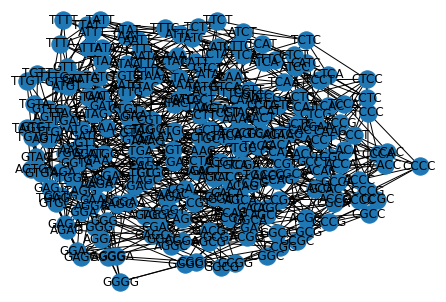

In [8]:
#visulaizing the graph
nx.draw(network,with_labels=True)

In [9]:
#Let's see the nodes of the graph
nodes = network.nodes
nodes

NodeView(('CTAC', 'TACT', 'ACTC', 'CTCG', 'TCGG', 'CGGG', 'GGGA', 'GGAG', 'GAGG', 'AGGC', 'GGCT', 'GCTG', 'CTGA', 'TGAG', 'GGCA', 'GCAG', 'CAGG', 'AGGA', 'GAGA', 'AGAA', 'GAAT', 'AATC', 'ATCA', 'TCAC', 'CACT', 'ACTT', 'CTTG', 'TTGA', 'TGAA', 'GAAC', 'AACC', 'ACCA', 'CCAG', 'AGGG', 'GAGT', 'AGTC', 'GTCA', 'TCAG', 'CAGA', 'AGAG', 'AGGT', 'GGTT', 'GTTG', 'TTGC', 'TGCA', 'CAGT', 'AGTG', 'GTGA', 'GAGC', 'AGCC', 'GCCA', 'CCAA', 'CAAG', 'AAGA', 'AGAT', 'GATC', 'ATCG', 'TCGC', 'CGCA', 'GCAC', 'CACC', 'CCAC', 'ACTG', 'CTGC', 'CTCC', 'TCCA', 'CAGC', 'GCCT', 'CCTG', 'CTGG', 'TGGC', 'GCAA', 'CAAC', 'AACA', 'ACAC', 'CACA', 'ACAG', 'AGCG', 'GCGA', 'CGAG', 'GTCT', 'TCTG', 'CTGT', 'TGTC', 'TCTC', 'CAAA', 'AAAA', 'AAAG', 'AAGG', 'GGCC', 'GCCC', 'CCCA', 'AGCA', 'GCAT', 'CATT', 'ATTT', 'TTTC', 'TTCA', 'TCAA', 'AAAC', 'AACT', 'TGTT', 'GTTT', 'TTTG', 'TTGT', 'GGTA', 'GTAA', 'TAAT', 'ATCT', 'TCTT', 'CTTA', 'TTAT', 'TATA', 'ATAC', 'TACA', 'ACAT', 'ATTC', 'AGTT', 'TTCT', 'CTTT', 'TTTT', 'TTGG', 'GCTT', 'TTAC'

### Defining a significant feature
StellarGraph is a graph algorithm that requires features for each node.

We will condsider the ASCII Code of the letter 'A','T','C' or 'G' in the small sequence of 4 letters (the node).

In [10]:
g_feature_attr = network.copy()
def compute_features(node):
  L=[ord(c) for c in node]
    # in general this could compute something based on other features, but for this example,
    # we don't have any other features, so we'll just do something basic with the ASCII Code
  return L

In [11]:

for node, node_data in g_feature_attr.nodes(data=True):
    node_data["feature"] = compute_features(node)

In [12]:
network.nodes

NodeView(('CTAC', 'TACT', 'ACTC', 'CTCG', 'TCGG', 'CGGG', 'GGGA', 'GGAG', 'GAGG', 'AGGC', 'GGCT', 'GCTG', 'CTGA', 'TGAG', 'GGCA', 'GCAG', 'CAGG', 'AGGA', 'GAGA', 'AGAA', 'GAAT', 'AATC', 'ATCA', 'TCAC', 'CACT', 'ACTT', 'CTTG', 'TTGA', 'TGAA', 'GAAC', 'AACC', 'ACCA', 'CCAG', 'AGGG', 'GAGT', 'AGTC', 'GTCA', 'TCAG', 'CAGA', 'AGAG', 'AGGT', 'GGTT', 'GTTG', 'TTGC', 'TGCA', 'CAGT', 'AGTG', 'GTGA', 'GAGC', 'AGCC', 'GCCA', 'CCAA', 'CAAG', 'AAGA', 'AGAT', 'GATC', 'ATCG', 'TCGC', 'CGCA', 'GCAC', 'CACC', 'CCAC', 'ACTG', 'CTGC', 'CTCC', 'TCCA', 'CAGC', 'GCCT', 'CCTG', 'CTGG', 'TGGC', 'GCAA', 'CAAC', 'AACA', 'ACAC', 'CACA', 'ACAG', 'AGCG', 'GCGA', 'CGAG', 'GTCT', 'TCTG', 'CTGT', 'TGTC', 'TCTC', 'CAAA', 'AAAA', 'AAAG', 'AAGG', 'GGCC', 'GCCC', 'CCCA', 'AGCA', 'GCAT', 'CATT', 'ATTT', 'TTTC', 'TTCA', 'TCAA', 'AAAC', 'AACT', 'TGTT', 'GTTT', 'TTTG', 'TTGT', 'GGTA', 'GTAA', 'TAAT', 'ATCT', 'TCTT', 'CTTA', 'TTAT', 'TATA', 'ATAC', 'TACA', 'ACAT', 'ATTC', 'AGTT', 'TTCT', 'CTTT', 'TTTT', 'TTGG', 'GCTT', 'TTAC'

In [13]:
G = StellarGraph.from_networkx(g_feature_attr, node_features="feature")
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 1006

 Node types:
  default: [256]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [1006]
        Weights: all 1 (default)
        Features: none


### Splitting the graph into train and test subgraphs

In [14]:
edge_splitter_test = EdgeSplitter(G)

In [15]:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 100 positive and 100 negative edges. **


In [16]:
batch_size = 50
epochs = 100  # The number of training epochs for training the GraphSAGE model.

# train, test, validation split
train_size = 0.6
test_size = 0.2
val_size = 0.2

In [17]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_val = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_val, edge_ids_val, edge_labels_val = edge_splitter_val.train_test_split(
    p=val_size, method="global", keep_connected=True
)

** Sampled 181 positive and 181 negative edges. **


In [18]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_val)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 435 positive and 435 negative edges. **


In [19]:
print(G_train.info())
print(G_val.info())
print(G_test.info())

StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 290

 Node types:
  default: [256]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [290]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 725

 Node types:
  default: [256]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [725]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 906

 Node types:
  default: [256]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [906]
        Weights: all 1 (default)
        Features: none


In [20]:
num_samples = [10, 5]

## Preparing the Graph as an Input for the model

In [21]:
train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples)
val_gen = GraphSAGELinkGenerator(G_val, batch_size, num_samples)
test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples)

In [22]:
layer_sizes = [32, 32]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.2
)

In [23]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [24]:
logits = link_classification(
    output_dim=1, output_act="linear", edge_embedding_method="ip"
)(x_out)

prediction = keras.layers.Activation(keras.activations.sigmoid)(logits)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


### Defining the learning model
Before creating our model, let's define some metrics to evaluate our model later

In [25]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [26]:
#Let's create our model
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy,
             keras.metrics.MeanSquaredError(name='my_mse'),
             keras.metrics.AUC(name='my_auc'),
             f1_m,precision_m,recall_m,
             keras.metrics.FalseNegatives(
             thresholds=None, name=None, dtype=None),
             ],
)

In [27]:
train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)
val_flow = val_gen.flow(edge_ids_val, edge_labels_val)
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

#### Evaluate the untrained

In [28]:
init_train_metrics = model.evaluate(train_flow)
init_val_metrics = model.evaluate(val_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

4/4 [==============================] - 0s 45ms/step - loss: 0.8128 - binary_accuracy: 0.5000 - my_mse: 0.3032 - my_auc: 0.5000 - f1_m: 0.5000 - precision_m: 0.5000 - recall_m: 0.5000 - false_negatives: 0.0000e+00

Train Set Metrics of the initial (untrained) model:
	loss: 0.8126
	binary_accuracy: 0.5000
	my_mse: 0.3031
	my_auc: 0.4989
	f1_m: 0.6636
	precision_m: 0.5000
	recall_m: 1.0000
	false_negatives: 0.0000

Validation Set Metrics of the initial (untrained) model:
	loss: 0.8129
	binary_accuracy: 0.5000
	my_mse: 0.3032
	my_auc: 0.5000
	f1_m: 0.4707
	precision_m: 0.4525
	recall_m: 0.5000
	false_negatives: 0.0000

Test Set Metrics of the initial (untrained) model:
	loss: 0.8128
	binary_accuracy: 0.5000
	my_mse: 0.3032
	my_auc: 0.5000
	f1_m: 0.5000
	precision_m: 0.5000
	recall_m: 0.5000
	false_negatives: 0.0000


#### Train the model

In [29]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=val_flow, verbose=0, shuffle=True,
)

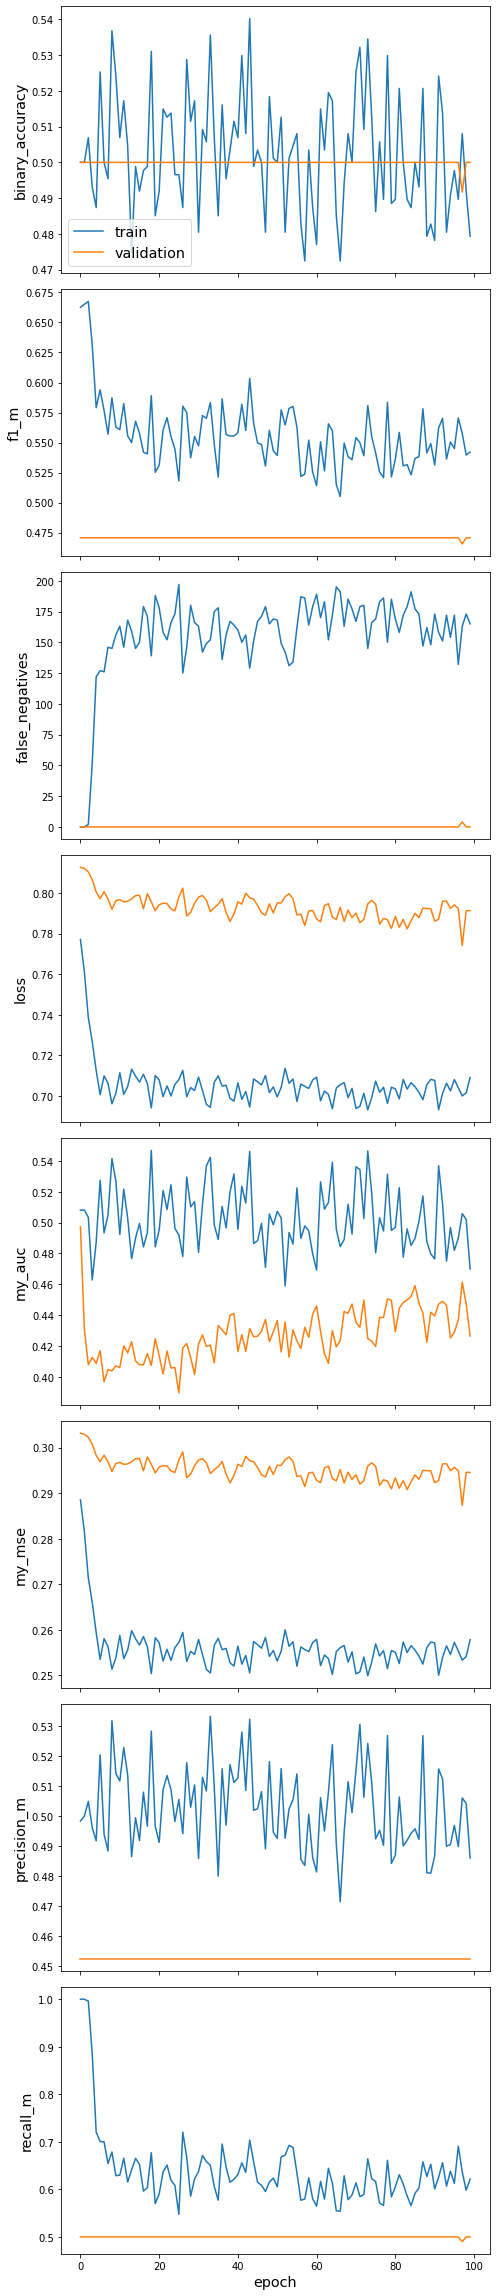

In [30]:
sg.utils.plot_history(history)

#### Evaluate the trained model

In [31]:
train_metrics = model.evaluate(train_flow)
val_metrics = model.evaluate(val_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

4/4 [==============================] - 0s 42ms/step - loss: 0.7916 - binary_accuracy: 0.5000 - my_mse: 0.2947 - my_auc: 0.4807 - f1_m: 0.5000 - precision_m: 0.5000 - recall_m: 0.5000 - false_negatives: 0.0000e+00

Train Set Metrics of the trained model:
	loss: 0.7748
	binary_accuracy: 0.5000
	my_mse: 0.2872
	my_auc: 0.4850
	f1_m: 0.6594
	precision_m: 0.4950
	recall_m: 0.9979
	false_negatives: 1.0000

Validation Set Metrics of the trained model:
	loss: 0.7916
	binary_accuracy: 0.5000
	my_mse: 0.2947
	my_auc: 0.4133
	f1_m: 0.4707
	precision_m: 0.4525
	recall_m: 0.5000
	false_negatives: 0.0000

Test Set Metrics of the trained model:
	loss: 0.7916
	binary_accuracy: 0.5000
	my_mse: 0.2947
	my_auc: 0.4807
	f1_m: 0.5000
	precision_m: 0.5000
	recall_m: 0.5000
	false_negatives: 0.0000


**Generalizability**: Let's see how well the algorithm performs on the data if other species, we will take Ferroglobus placidus as example.

In [32]:
dna_sequence_test ="TTTGACTGATTTAAGCAAAACATTAAAGTATTTTTCACATTCATTTAAGCTGTGGACCTACAGCAGAAACGTGTTCCTACCTTTAACGAGATCCTGCAGAAATCGCTGCTACTACTGCGGATTTAGGAGAGAGAACGACGGCTTAATGAGCCTCGACTCGATAATCTCTTTGCTAAGGAAAGCGAAAAACGCAACCGAAGCCTTGCTCACGTTTGGAGAACAACCAGAGTTCAGCGAGAAGGTAAAAAAAGATCTTAAGGCTTTAGGATTCAGCAGTTTTTCGGATTACGTTAAGTCCGTCTGCGAAATTGCAATTAAGGAGGGCTTTTTACCCCACACGAATCCGGGAGTCGTTGATACTGACTTTTTGAAGAAGGTTAAAGATTTCAACGCTAGCATGGGGCTTATGCTTGAGCAAGCGGTTGAACTGGAGTGTCACAAAGAGAGTCCCGGAAAGAAGCCGGAAGAAAGAATAAAATTCATAAAAAAAGCTGGAAAGCTGAAAATTCCTTTCACCACCGGAATTTTAGTGGGGATAGGTGAAAAGTTCGAAGACAGAATTTACTCCCTCGAAGTTATAGCAGATTTACACGACAACTACGGACACATTCAGGAGGTGATAATCCAGAATTTTTCACCGAAGAAGGGAACAAAAATGGAAAACTTTAAACCCCCTTCTACTTCCGAAATGCTTGAAACTGTCAAAGTAGCCAGAAAGATTATTCAGAAGGATGTAGCGATCCAAGTTCCTCCGAACTTGGTGAAGGAAGTTGAGGTGTTCGTGAAAGCCGGAGCTAACGATCTTGGAGGAATTTCTGACGTAACTCCAGACTTCATAAATCCCGAACATCCATGGCCGAAGGTTGAGGAGATATCCGAGAGGTTGAAAGGGTACGAATTAAAGGAGAGGTTGCCAATCTATCCAAAATTCGTGGTGGAAGGTTGGTACAGCGAAAAAATCGCTCCGCTTATTGAAGCTTATTCAGACGAGGAGGGTTACAAATGCTGAAAGAACTTCTCGTTAAGGAACCGTTCAAAACGTTCGAAATAGCTAACAAAATCAGAGAGGAGGAAGTAGGAGACGTGGTAACTTACGTCGTTAATAGGAACATAAACTTCACGGACATCTGCATTAACTCCTGCAAATTCTGCTCATATCGGAACAGAAGGAAGTTCGTTTTGTCAACCGACGAGATAAAGAAGAAGGTTGAAGAAGCCGTAAATTACGGCTGCACGGAAGTTTGCATTCAAGGAGGACTTTATCCTAATGCTGATGTGGAATTTTACAAATCTATTTTAAGAGCGGTGAGGGAAGTTTCGAAGGACATTCACATTCACGCATTCTCTCCAATGGAAATCGTGCACGCGGCAAGAAACTCTGGATGCGATGTTGAGGATGTTTTGAGAGAGCTTAAAAAAGCGGGATTGAATTCTATGCCGGGAACAGCTGCTGAAATTCTTGACGACGAAATAAGAAGAATAATCTGTCCGGATAAGCTTTCGGTGGAGGAATGGGTCGACGTTATTAAGACCGCCCATTACTTGGGAATTCCGACGACAGCAACCATAATGTACGGGCACATCGAAAGCTGGGAGCACAGAATAAAGCATCTTATGATCATAAGGGAAATTCAGGAGGAAACTTCCGGATTCACCGAATTCATTCCCCTCCCGTTCATGAACAAAAACAACGAGCTCGGGAAAATAGCAAGGCAATCCTCCGGTTTCGAAGACCTGTTGATGATTTCAATCGCGAGAATAATTCTCCATCCGGTTATCCCGAACATTCAGGCTTCGTGGGTTAAGCTTGGAATATTGCTCAGGCAGCTTTGAATTTCGGAGCAAACGACCTCGGAGGAACATTGATGGAAGAGAACATTTCGAGGCTTGCTGGCTCCACTTCCGGAGAGTTTCTTCCGAAAGAGGAAATGGAAAGATTAATACTGAACGCCGGCAGAATCCCGGCTGAGAGAGATACGCTTTACAGAATAATCAGAGTTAGAGAAAATGTCTGAAATATCACTTTACAGCGTTTTCGCAACGGAGCGAGCGAAGCGTTGAGCAGAGGAACATTCTTTCGAAGGTGAAACTTCCCCTAAAAGTCGTCGAAGTGGATAAAGATTTGTTCCCCGATAAGGCTGAGGAACTTGAGGAGATAGGAGCCTCCTTCGGCGTTCACGGCTTGCCATTAAACGTCCTCTTTTACAAAGATATACCAATTTACGCGAGCGGATTTTTGAGCGAGAAAGACGTTTTAAAGTTAATTGAGGTAACGAAATCGCTCTTAAAAGCGGACGAAAGAAAAGTCTTAGAGGAAGGAAGGAAAGTAATTGAGAAAGTCGAAAACAGAAAAAAGGGTAAAGAGGGTTTAGCTGGATTAGAGCTTCTTTAATAGTGGGAGCAATTCTTTTCGGGATTATGCTGATGAGGCTTGAGGAAGTTGAAAGCGATTTCAAAGTTGCTGGAATACTCTATTTCCTCGGAATGATACTGAGCTTTTTCACAGGAATTATTGGGGTGCTGATCGGAATAGCAACTACAGCTCTAATTTACATCAGCGCAAAAAGCGCTTTAAAGAGGATATCCGCTGCTTGAAGAGAAAATGTTTTATCCAATCCCGTATTACTTATATTCGACCCCAGCGGGGAGGGGTGTGGAGAGAGCTAAGCTTTCGATGAAGCTCCCTGCAAGGCTGGGGTTACACCATGCCGATAGGTCCCCTGGTGAGAGAGCCCTGGCTTTCGATGACCCTGGGGCAACCCGGGCATGGGACAAAGCCCCGAGAGGTCAGCCGTTTGAGAGAGCGCAGCTTTCGATGATATACGGCGTTACACTCGGGGCACAGGAATTAGAAAACCTTTTTGAGTAAATCTTCGAACTCCTCTCTTCTGATAACTCTTCCGTGCCCCGGATAGAGTTTCTCAAACTCAAATTTCAAAACCTTCCTCAGGCTCCTTCTGTATTCTTCGTCGTTCCAGTTGAAGTTTTTCGAGGACAACGTTGGATTGTCACTAAAGACTTTACATCTAACGAGATCTCCGCAAATAAGCGAGTCACCGACGAGAATGGAAATGCTTCCTTCAGTGTGTCCGGGAGTGTGGATTATTTCGAGATCTTTTAACTCCTCTACGCTTTCAACCTCCTCAAGATACTTTGGCTTCTTTATGCTTTCGTAAAACCTCGCAAAAGACCCTATCAAGCCCTTGTATTCGTGTTTCTTAATTCCTTTAAGATATTCGAACTCTTTCGGATGTGCGTATACCTTGCTCTTCAAAATTTTCGAAAGAGCGCGAGCTGAGCCCATGTGATCGAAGTGGGAGTGCGTGAGAATAATTCCTTCGCATTCCTTAACAGCTTCGGCAATTCTCCTTTCATTCCCCGGTAATCCGGTATCTACGACGCCATCAACTACTACGAGGTAAACGTTACAGCCTTTCGCCTTTATCAGTTCCACCATGTTACGAGATCTTTTGAATGTATTTATTAACATTGAGGGGAAATTAGGAATATGTACCGCTTTGTGGAGCATACTGCAGACATAGCTTTTGAAGTTGAAGCTGAAAGCCTCGAAGAGCTTTTTATAGATGCTGCAAACGCCTTTTACGAAGCTTTTTGTAACAGAGACCTTGTCAAAGAGGAGAAGAGAGAAGATTGGAGCTCGAGGAAGAAGACGTAGAGCATCTCCTTTACTCGTGGCTGAACGAGATTCTCTTTCTGTTGATGCCGAGCACTTCGCAGCGAAAAGAGTTGAAGTCAGCGTAGAGAACAACTCTCTAAAAGCGAGACTTATCGGGGGAAAAATAACTCCTGAAGCCTCAAACTCGAACCTAAAGCCATAACGATGCACAAATTCAGAGTTGAAAGGAAGGACGGAAAATATATTTCTTTATGGACAGTAGCACCTGGAGCCCCAAGACCACCGCGGTCACCCGGCCTGTTGAGACCCACGAGCTCATTCGCAATGCAGCCGATATCTCCATCATCGTTATCTACTTCGTGGTAGTGATGGCCGTCGGACTGTGGGCTATGTTTTCCACCAATCGTGGGACTGTTGGAGGCTTCTTCCTGGCAGGCCGAAGTATGGTGTGGTGGCCGATTGGAGCCTCCCTCTTTGCTAGTAACATTGGAAGTGGCCACTTTGTGGGGCTGGCCGGGACTGGGGCAGCTTCAGGCATCGCCATTGGAGGCTTTGAATGGAATGCCCTGGTTTTGGTGGTTGTGCTGGGCTGGCTGTTTGTCCCCATCTATATTAAGGCTGGGGTGGTGACAATGCCAGAGTACCTGAGGAAGCGGTTTGGAGGCCAGCGGATCCAGGTCTACCTTTCCCTTCTGTCCCTGCTGCTCTACATTTTCACCAAGATCTCGGCAGACATCTTCTCGGGGGCCATATTCATCAATCTGGCCTTAGGCCTGAATCTGTATTTAGCCATCTTTCTCTTATTGGCAATCACTGCCCTTTACACAATTACAGGGGGCCTGGCGGCGGTGATTTACACGGACACCTTGCAGACGGTGATCATGCTGGTGGGGTCTTTAATCCTGACTGGGTTTGCTTTTCACGAAGTGGGAGGCTATGACGCCTTCATGGAAAAGTACATGAAAGCCATTCCAACCATAGTGTCTGATGGCAACACCACCTTTCAGGAAAAATGCTACACTCCAAGGGCCGACTCCTTCCACATCTTCCGAGATCCCCTCACGGGAGACCTCCCATGGCCTGGGTTCATCTTTGGGATGTCCATCCTTACCTTGTGGTACTGGTGCACAGATCAGGTCATTGTGCAGCGCTGCCTCTCAGCCAAGAATATGTCTCACGTGAAGGGTGGCTGCATCCTGTGTGGGTATCTAAAGCTGATGCCCATGTTCATCATGGTGATGCCAGGAATGATCAGCCGCATTCTGTACACAGAAAAAATTGCCTGTGTCGTCCCTTCAGAATGTGAGAAATATTGCGGTACCAAGGTTGGCTGTACCAACATCGCCTATCCAACCTTAGTGGTGGAGCTCATGCCCAATGGACTGCGAGGCCTGATGCTATCAGTCATGCTGGCCTCCCTCATGAGCTCCCTGACCTCCATCTTCAACAGCGCCAGCACCCTCTTCACCATGGACATCTACGCCAAGGTCCGCAAGAGAGCATCTGAGAAAGAGCTCATGATTGCCGGAAGGTTGTTTATCCTGGTGCTGATTGGCATCAGCATCGCCTGGGTGCCCATTGTGCAGTCAGCACAAAGTGGGCAACTCTTCGATTACATCCAGTCCATCACCAGTTACTTGGGACCACCCATTGCGGCTGTCTTCCTGCTTGCTATTTTCTGGAAGAGAGTCAATGAGCCAGGAGCCTTTTGGGGACTGATCCTAGGACTTCTGATTGGGATTTCACGTATGATTACTGAGTTTGCTTATGGAACCGGGAGCTGCATGGAGCCCAGCAACTGTCCCACGATTATCTGTGGGGTGCACTACTTGTACTTTGCCATTATCCTCTTCGCCATTTCTTTCATCACCATCGTGGTCATCTCCCTCCTCACCAAACCCATTCCGGATGTGCATCTCTACCGTCTGTGTTGGAGCCTGCGCAACAGCAAAGAGGAGCGTATTGACCTGGATGCGGAAGAGGAGAACATCCAAGAAGGCCCTAAGGAGACCATTGAAATAGAAACACAAGTTCCTGAGAAGAAAAAAGGAATCTTCAGGAGAGCCTATGACCTATTTTGTGGGCTAGAGCAGCACGGTGCACCCAAGATGACTGAGGAAGAGGAGAAAGCCATGAAGATGAAGATGACGGACACCTCTGAGAAGCCTTTGTGGAGGACAGTGTTGAACGTCAATGGCATCATCCTGGTGACCGTGGCTGTCTTTTGCCATGCATATTTTGCCTGAATGCTGCCGCAGCAAGTCGGCTTCGTGTGCGCGGTGCTGGCCCTGGTGTGCTGTGCGTCCGGCCTCTTCGGCAGCTTGGGGCACAAAACAGCTTCTGCTAGCAAACGTGTCCTGCCAGACACATGGAGAAATAGAAAGTTGATGGCCCCAGTGAATGGGACACAGACAGCCAAGAACTGCACAGATCCTGCGATTCACGAGTTCCCCACAGATCTGTTCTCCAATAAGGAGCGACAGCACGGAGCCGTCCTGCTGCACATCCTTGGTGCTCTGTATATGTTCTATGCCTTGGCCATAGTGTGCGATGACTTCTTTGTTCCGTCTCTAGAGAAGATCTGTGAGAGACTCCATCTGAGCGAAGATGTGGCTGGAGCCACCTTCATGGCTGCAGGAAGCTCAACGCCAGAGCTGTTTGCGTCTGTTATTGGGGTGTTCATCACCCATGGGGACGTCGGGGTGGGCACCATCGTGGGCTCTGCTGTGTTCAACATCCTGTGCATAATTGGAGTGTGCGGACTGTTTGCTGGCCAGGTGGTCCGTCTGACGTGGTGGGCCGTGTGCCGAGACTCCGTGTACTACACCATCTCTGTCATCGTGCTCATCGTGTTCATATATGATGAACAAATTGTGTGGTGGGAAGGCCTGGTGCTCATCATCTTGTATGTGTTTTATATTCTGATCATGAAGTACAATGTGAAGATGCAAGCCTTTTTCACAGTCAAACAAAAGAGCATTGCAAACGGTAACCCGGTCAACAGTGAGCTGGAGGCTGGTAATGATTTCTATGACGGTAGCTATGATGACCCTTCCGTGCCATTGCTGGGGCAAGTGAAGGAGAAGCCACAGTATGGCAAGAACCCCGTGGTGATGGTGGACGAGATTATGAGCTCCAGCCCTCCCAAGTTCACCTTCCCTGAAGCAGGCTTACGAATCATGATCACCAATAAGTTTGGACCCAGGACCCGACTACGGATGGCCAGCAGGATCATCATTAATGAGCGGCAGAGACTGATCAACTCGGCCGTGAGCAGTAAGCCGCTTCAAAACGGGAGGCACGAGAACATTGAGAACGGGAATGTTCCTGTGGAAAACCCCGAAGACCCTCAGCAGAATCAGGAGCAGCAGCCGCCGCCACAGCCACCACCGCCAGAGCCAGAGCCGGTGGAGGCTGACTTCCTGTCCCCCTTCTCCGTGCCGGAGGCCAGAGGGGACAAGGTCAAGTGGGTGTTCACCTGGCCCCTCATCTTCCTCCTGTGCGTCACCATTCCCAACTGCAGCAAGCCCCGCTGGGAGAAGTTCTTCATGGTCACCTTCATCACCGCCACGCTGTGGATCGCCTCCTACATCATGGTGTGGCTGGTGACTATTATCGGATACACACTTGGGATCCCGGATGTCATCATGGGCATTACTTTCCTGGCAGCAGGGACAAGTGTTCCAGACTGCATGGCCAGCCTAATTGTGGCGAGACAAGGCCTTGGGGACATGGCAGTCTCCAACACCATAGGAAGCAACGTGTTTGACATCCTGGTAGGACTTGGTGTACCGTGGGGCCTGCAGACCATGGTTGTTAATTATGGATCAACAGTGAAGATCAACAGCCGGGGGCTGGTCTATTCCGTGGTCCTGTTGCTGGGCTCTGTCGCTCTCACCGTCCTCGGCATCCACCTAAACAAGTGGCGACTGGACCGGAAGCTGGGTGTCTACGTGCTGGTTCTCTACGCCATCTTCTTGTGCTTCTCCATAATGATAGAGTTTAACGTCTTTACCTTCGTCAACTTGCCGATGTGCCGGGAAGACGATTAGATGGGTGTCAGGCAACAGTTGGCCTTGCTGCTGCTGCTGCTGCTCCTGCTCTGGGGCCTGGGGCAGCCAGTGTGGCCAGTCGCTGTGGCCTTGACCCTGCGCTGGCTCCTGGGGGATCCCACATGTTGCGTGCTACTTGGGCTGGCCATGTTAGCACGGCCCTGGCTCGGCCCCTGGGTGCCCCATGGGCTGAGCCTGGCAGCTGCGGCCCTGGCACTAACCCTCCTGCCAGCACGGCTGCCCCCAGGACTACGCTGGCTGCCGGCTGATGTGATCTTCTTGGCCAAGATCCTCCACCTGGGCCTGAAGATCAGGGGATGCTTGAGCCGGCAGCCGCCTGACACCTTTGTAGATGCCTTCGAGCGGCGAGCACGAGCGCAGCCTGGCAGGGCACTCTTGGTGTGGACGGGGCCTGGGGCCGGCTCAGTCACCTTTGGTGAGCTGGATGCCCGGGCCTGCCAGGCGGCATGGGCCCTGAAGGCTGAGCTGGGTGACCCTGCGAGCCTGTGTGCCGGGGAGCCTACTGCCCTCCTTGTGCTGGCTTCCCAGGCCGTTCCAGCCCTGTGTATGTGGCTGGGGCTGGCCAAGCTGGGCTGCCCAACAGCCTGGATCAACCCGCATGGCCGGGGGATGCCCCTGGCGCACTCTGTGCTGAGCTCTGGGGCCCGGGTGCTGGTGGTGGACCCAGACCTCCGGGAGAGCCTGGAGGAGATCCTTCCCAAGCTGCAGGCTGAGAACATCCGCTGCTTCTACCTCAGCCATACCTCCCCTACACCAGGGGTGGGGGCTCTGGGGGCTGCATGGTGGCGAGCGCGCGAGTGCAGAAGCTGGTGCGGCGCTACAAGCTGGCGATTGCCACGGCGCTGGCCATCCTGCTGCTGCAGGGCCTGGTAGTGTGGAGCTTCAGCGGCCTGGAGGAGGACGAGGCGGGCGAGAAAGGAAGGCAGAGGAAGCCACGGCCACTGGACCCTGGCGAAGGTTCCAAGGACACAGACAGTTCAGCAGGGCGACGGGGCAGCACAGGCAGAAGGCATGGGCGCTGGCGGGGCCGTGCTGAGAGCCCAGGAGTGCCCGTGGCCAAGGTGGTACGGGCAGTAACCAGCCGGCAGAGAGCCAGCCGGCGGGTCCCACCTGCCCCACCTCCGGAAGCCCCAGGCCGCCAGAACCTGAGTGGGGCAGCAGCTGGGGAGGCGCTGGTAGGGGCAGCTGGCTTCCCACCACACGGAGATACAGGGAGCGTGGAGGGCGCCCCCCAGCCCACGGACAATGGCTTCACCCCCAAGTGCGAGATCGTGGGCAAGGACGCACTGTCTGCACTGGCCCGGGCCAGCACCAAGCAGTGCCAGCAGGAGATCGCCAATGTGGTGTGCCTGCACCAGGCTGGGAGCCTCATGCCCAAGGCTGTGCCCCGGCACTGTCAGCTGACTGGGAAGATGAGCCCCGGCATCCAGTGGGATGAGAGCCAAGCCCAGCAGCCCATGGATGGCCCCCCGGTGCGAATCGCCTACATGCTGGTGGTTCACGGCCGCGCCATCCGCCAGCTGAAGCGTCTCCTCAAGGCCGTTTATCACGAGCAGCACTTCTTTTACATCCATGTGGACAAGCGTTCCGACTACCTGCACCGGGAGGTGGTGGAGCTGGCCCAGGGCTATGATAACGTGCGGGTGACGCCCTGGCGCATGGTTACCATCTGGGGCGGGGCCAGCCTCCTGACGATGTACCTGCGGAGCATGCGGGACCTGCTAGAGGTGCCTGGCTGGGCCTGGGACTTCTTCATCAACCTCAGTGCCACTGACTATCCAACCAGGACCAATGAGGAGCTGTTCCTATCCAAGAACCGGGACAAGAATTTCCTCAAGTCACATGGCCGGGACAACTCCAGGTTCATCAAGAAACAGGGCCTGGACCGGCTCTTCCATGAGTGCGACTCACACATGTGGCGCCTGGGCGAGCGGCAGATCCCAGCAGGCATTGTGGTGGATGGCGGTTCTGACTGGTTCGTGCTGACACGCAGCTTTGTGGAGTATGTGGTGTACACAGATGACCCGCTTGTGGCCCAGCTGCGCCAGTTCTACACATACACACTGCTCCCAGCCGAGTCCTTCTTCCACACGGTGCTGGAGAACAGCCTGGCCTGTGAGACCCTCGTGGACAACAACCTGCGGGTCACCAACTGGAACCGCAAGCTGGGCTGCAAGTGCCAGTACAAGCACATTGTGGACTGGTGTGGCTGCTCCCCCAACGACTTCAAGCCACAGGACTTCCTCCGGCTGCAGCAAGTCTCCAGACCCACCTTCTTCGCCCGGAAGTTCGAGTCGACTGTGAACCAGGAGGTGCTGGAAATCCTGGACTTCCACCTGTACGGCAGCTACCCCCCCGGCACGCCAGCCCTCAAGGCCTACTGGGAGAACACCTACGACGCGGCTGATGGCCCCAGTGGGCTCAGTGATGTCATGCTCACTGCTTACACAGCCTTCGCCCGCCTCAGCCTGCACCATGCCGCCACTGCTGCACCCCCAATGGGCACCCCACTCTGCAGGTTTGAGCCCAGGGGCTTGCCGTCCAGCGTGCACCTGTATTTCTATGACGACCATTTCCAGGGCTACCTGGTGACGCAGGCGGTGCAGCCCTCAGCCCAGGGGCCGGCAGAGACGCTTGAGATGTGGCTGATGCCCCAAGGGTCGCTGAAGCTGTTGGGGCGCAGTGACCAGGCCAGCCGGCTCCAGAGTCTGGAGGTTGGCACTGATTGGGACCCCAAAGAGCGTCTTTTCCGGAACTTTGGGGGGTTACTGGGGCCGCTGGACGAGCCTGTGGCCGTGCAGCGCTGGGCCCGGGGCCCCAACCTAGCCACAGTGGTCTGGATCGACCCAACCTATGTGGTGGCCACATCTTATGACATCACAGTAGATACGGAGACTGAGGTCACGCAATACAAGCCCCCACTGAGCCGGCCCCTGCGGCCAGGGCCCTGGACTGTTCGACTCCTTCAGTTCTGGGAACCGCTGGGTGAGACCCGCTTCCTTGTGCTGCCCTTGACCTTCAACCGCAAACTACCTCTCAGGAAAGATGATGCCAGCTGGCTGCACGCAGGGCCACAACGAGTACATGGAGCAGAGTTTCCAGGGCCTGAGTAGCATCCTGAACCTGCCTCAGCCGGAGCTCGCGGAGGAGGCTGCCCAGCGGCACACACAGCTCACAGGCCCTGCGCTCGAGGCCTGGACAGACAGGGAACTGAGCAGCTTCTGGTCCGTGGCTGGACTGTGTGCCATAGGCCCCTCTCCCTGCCCCTCCCTGGAGCCCTGCAGACTGACCAGCTGGAGCTCTCTGTCCCCCGACCCCAAATCAGAGCTGGGGCCTGTCAAAGCAGACGGGCGACTCAGGTAGATGGCTTTGCCTCTGAGGCCCCTGACCCGGGGCTTGGCCAGCGCTGCCAAAGGAGGCCACGGAGGAGCAGGAGCTCGTACCTGGCGTCTGCTGACCTTCGTGCTGGCGCTGCCCAGCGTGGCCCTCTGCACCTTCAACTCCTATCTCCACTCGGGCCACCGCCCGCGCCCCGAGTTCCGTCCCTACCAACACCTCCGCATCCGCACCAAGCCCTACCCCTGGGGGGACGGCAACCACACTCTGTTCCACAATAGCCACGTGAACCCTCTGCCCACGGGCTACGAACACCCCTGAATGGCATCTACGGAAGGTGCCAACAATATGCCCAAGCAGGTGGAAGTGCGAATGCACGACAGTCATCTTGGCTCAGAGGAACCCAAGCACCGGCACCTGGGCCTGCGCCTGTGTGACAAGCTGGGGAAGAATCTGCTGCTCACCCTGACGGTGTTTGGTGTCATCCTGGGAGCAGTGTGTGGAGGGCTTCTTCGCTTGGCATCTCCCATCCACCCTGATGTGGTTATGTTAATAGCCTTCCCAGGGGATATACTCATGAGGATGCTAAAAATGCTCATTCTCCCTCTAATCATCTCCAGCTTAATCACAGGGTTGTCAGGCCTGGATGCTAAGGCTAGTGGCCGCTTGGGCACGAGAGCCATGGTGTATTACATGTCCACGACCATCATTGCTGCAGTACTGGGGGTCATTCTGGTCTTGGCTATCCATCCAGGCAATCCCAAGCTCAAGAAGCAGCTGGGGCCTGGGAAGAAGAATGATGAAGTGTCCAGCCTGGATGCCTTCCTGGACCTTATTCGAAATCTCTTCCCTGAAAACCTTGTCCAAGCCTGCTTTCAACAGATTCAAACAGTGACGAAGAAAGTCCTGGTTGCACCACCGCCGGACGAGGAGGCCAACGCAACCAGCGCTGTTGTCTCTCATGCCGCGCCCCCGCCTGCTGGCCGCGCTGTGCGGCGCGCTGCTCTGCGCCCCCAGCCTCCTCGTCGCCCTGGATATCTGTTCCAAAAACCCCTGCCACAACGGTGGTTTATGCGAGGAGATTTCCCAAGAAGTGCGAGGAGATGTCTTCCCCTCGTACACCTGCACGTGCCTTAAGGGCTACGCGGGCAACCACTGTGAGACGAAATGTGTCGAGCCACTGGGCCTGGAGAATGGGAACATTGCCAACTCACAGATCGCCGCCTCGTCTGTGCGTGTGACCTTCTTGGGTTTGCAGCATTGGGTCCCGGAGCTGGCCCGCCTGAACCGCGCAGGCATGGTCAATGCCTGGACACCCAGCAGCAATGACGATAACCCCTGGATCCAGGTGAACCTGCTGCGGAGGATGTGGGTAACAGGTGTGGTGACGCAGGGTGCCAGCCGCTTGGCCAGTCATGAGTACCTGAAGGCCTTCAAGGTGGCCTACAGCCTTAATGGACACGAATTCGATTTCATCCATGATGTTAATAAAAAACACAAGGAGTTTGTGGGTAACTGGAACAAAAACGCGGTGCATGTCAACCTGTTTGAGACCCCTGTGGAGGCTCAGTACGTGAGATTGTACCCCACGAGCTGCCACACGGCCTGCACTCTGCGCTTTGAGCTACTGGGCTGTGAGCTGAACGGATGCGCCAATCCCCTGGGCCTGAAGAATAACAGCATCCCTGACAAGCAGATCACGGCCTCCAGCAGCTACAAGACCTGGGGCTTGCATCTCTTCAGCTGGAACCCCTCCTATGCACGGCTGGACAAGCAGGGCAACTTCAACGCCTGGGTTGCGGGGAGCTACGGTAACGATCAGTGGCTGCAGGTGGACCTGGGCTCCTCGAAGGAGGTGACAGGCATCATCACCCAGGGGGCCCGTAACTTTGGCTCTGTCCAGTTTGTGGCATCCTACAAGGTTGCCTACAGTAATGACAGTGCGAACTGGACTGAGTACCAGGACCCCAGGACTGGCAGCAGTAAGATCTTCCCTGGCAACTGGGACAACCACTCCCACAAGAAGAACTTGTTTGAGACGCCCATCCTGGCTCGCTATGTGCGCATCCTGCCTGTAGCCTGGCACAACCGCATCGCCCTGCGCCTGGAGCTGCTGGGCTGTTAG"
print (len(dna_sequence_test))

13171


Create the graph of the new DNA

In [33]:
dna_list_test = []
for i in range(0,len(dna_sequence_test)-len(dna_sequence_test)%4,1):
    dna_list_test.append(dna_sequence_test[i:i+4])
    
Links_test = []
for i in range(len(dna_list_test)-1):
    Links_test.append((dna_list_test[dna_list_test.index(dna_list_test[i])],dna_list_test[dna_list_test.index(dna_list_test[i+1])]))

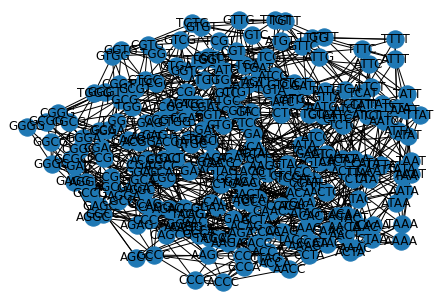

In [34]:
network_test = nx.Graph(Links_test)
nx.draw(network_test,with_labels=True)

In [35]:
g_feature_attr_test = network_test.copy()
for node, node_data in g_feature_attr_test.nodes(data=True):
    node_data["feature"] = compute_features(node)

In [36]:
Gr_test = StellarGraph.from_networkx(g_feature_attr_test, node_features="feature")
print(Gr_test.info())

StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 1012

 Node types:
  default: [256]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [1012]
        Weights: all 1 (default)
        Features: none


In [37]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train_test = EdgeSplitter(Gr_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train_test, edge_ids_train_test, edge_labels_train_test = edge_splitter_train_test.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 607 positive and 607 negative edges. **


In [38]:
train_gen_test = GraphSAGELinkGenerator(G_train_test, batch_size, num_samples)
train_flow_test = train_gen_test.flow(edge_ids_train_test, edge_labels_train_test, shuffle=True)
init_train_metrics_test = model.predict(train_flow_test)

In [39]:
train_metrics_test = model.evaluate(train_flow_test)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics_test):
    print("\t{}: {:0.4f}".format(name, val))

25/25 [==============================] - 1s 52ms/step - loss: 0.7800 - binary_accuracy: 0.5000 - my_mse: 0.2896 - my_auc: 0.4631 - f1_m: 0.6546 - precision_m: 0.4918 - recall_m: 1.0000 - false_negatives: 0.0000e+00

Train Set Metrics of the trained model:
	loss: 0.7800
	binary_accuracy: 0.5000
	my_mse: 0.2896
	my_auc: 0.4631
	f1_m: 0.6546
	precision_m: 0.4918
	recall_m: 1.0000
	false_negatives: 0.0000


Let's train our data on a sequence of the **Chimpnazee DNA**

In [40]:
chimp_dna = "TCCAGCCTTGGCACCTCAAGGCCTTGCCCGGGATGCCCCCGCCTGAACCCCTGGAAGCTGTTTCCACCTGCCAGCGGCACCCGACCAAGCCTAGCTGCAGACTCCAAAGGGCTCAGGTTTTGGCACAAGACTGTCCAGGGCTGGGCTGGGGCTGTTCTGCCCGAGGTGGACAAGCTGTGTCACAGAGAGACTGAGCAGCTCCAGGGAGACATCGCCCCCGTTCCCCAGCAGCAGCAGCAGCCACGTCCCTTGGCCAGCACGAGGCCAAGCCAGTGAGAGCTCAGAGACAGCATGGGTGGAAGGGCAACCCGTCGGCCTCCAGCTTCCAGATTCCCACACCTCCCCATGCCCTCACCATGTTCTTTTCGTTTCCGGCCCATTTCCGGAAGATCTGCAGGGACTGCCCAGCGTGCAGCATTCCTGGCGTGGCAAACACAACCTACAGGACACACAGGGCCAGGTGGGGGGTCAGGGCAGCAGATGCCCCCCACCCCCACTGCAGGCCCAAGCCCAGACACCTGCGGAAGACAGGAGACCGACGGATGTGGATGTGCTGGCCGGCCCTGCCGCAGGCCTCACCATCGGTCCTGGGTTGTCAGCAAAAGCCCGGTCGAAGGCCTTGATGTGCTTGAACTCAAACATGTTCCTCTGCACGAAAGTCTTGCGGATCTTCTGGTTGGTCCAGGGGATGAACAGCTTGTAGTAGTGGTTGGCCTTCTCGGTCAGCCCCGTGGAGAAGTAGATGGGCACCTTCAGGTTCATGCGCTCCCTGGGGACCACCGGCCCAGTCAGCACAGTGGCCACAGGGGAGAATGCTGCAGGGCAGGACTCGGCCGGGTCACCCCCCACACCCGTGTCTGCACAGCCCATGCACGGGCCAGGCTGAGTCCGGTCGCGACCACGGGAGGCCAGTGCCCTCAGCCTATGTCCCATTAAGCCCTGCAGCAGCCGGGCTCAGCGGAGAACCAGGAACCCCTACAAGAGCCGCACACAGTGGCGCTGACAGGATGTCACAGGCCTCCTGGGGTCACACAGCACACGAGCGGCCCCCAGGACAGCAGCAAGCAGGGCCAAGATGCCACCGCTACGCTGGACAGGGCTGCCCACCAACTGGACTGTGTTCAGGCCGGGCCAGGGGCTCCTTAAAGAGCCGTCCTGGCGGCACCTACCAGAAGGTCTCCAGGAGGATGCAGAGCTCCTGGGCGCGGCCCAGCGCGAACACAGGTATCAGCACCTGAGGGGGACACAAGGCAGGAGCCCTGGGCACGTGGCCCCTCGACACAGCAGGCAGCGTCCAGTGAGGGCACGGCCAGGTGCCCAAGAGCTGCGGCCTCATAGGGACCTTAGCCTCTCATCTGCTCCCAGTCCCGTCCCAGCCGCTCTCCAGAGACAGAAGGGAGCCGCATGAGAGACACGAGGGAGCCGCATGAGAGACAGGAGGGAGCCGCATGAGAGACAGAAGGGAGCCGCATGAGAGACAGAAGGGAGCCGCATGAGAGACAGAAGGGAGCTGCATGAGAGACAGAAGGAGCCTGGCCAGGGCTTCGTCCGCACCTGAGGTAGGAGGGAAAAGGGGCTCCCTAGGAAAGGGTCTCTGAGTTTTCCTCCTCAATGCTGAGCAAATCTTCCTCCCTCCCTGCCTGAAAATGCAGTACCCCCCACCCTGAGACCCTGACCCATGCCAAGGGCAGCCAAGCCTGCCAGAAAGACCAGCCCAGCATGGCCGAGGGCCCATGTCCCCACCCCTGCTGCAGCTACCTTCCCACCACGCTCCACGGTCTCGTGGACTTTCTTCAGGAAGTCTCGCTCCCGGCAGCGCTTGGAGTCACGGATGGTCGTGGCGTACGTGGACTCTGTGATGAGCAGGTTGGGGCGGCACTTGTCAATCCAGGCAGCTCTGGAACACGGGGGTGGGGGTGTGAGCCACGATGCACTGTCCCCACAGTTGCAGGGCTGGGT"
print(len(chimp_dna))

1959


In [41]:
dna_list_chimp = []
for i in range(0,len(chimp_dna)-len(chimp_dna)%4,1):
    dna_list_chimp.append(chimp_dna[i:i+4])
    
Links_chimp = []
for i in range(len(dna_list_chimp)-1):
    Links_chimp.append((dna_list_chimp[dna_list_chimp.index(dna_list_chimp[i])],dna_list_chimp[dna_list_chimp.index(dna_list_chimp[i+1])]))

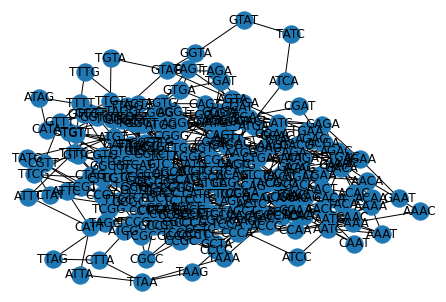

In [42]:
network_chimp = nx.Graph(Links_chimp)
nx.draw(network_chimp,with_labels=True)

In [43]:
g_feature_attr_chimp = network_chimp.copy()
for node, node_data in g_feature_attr_chimp.nodes(data=True):
    node_data["feature"] = compute_features(node)

In [44]:
Gr_chimp = StellarGraph.from_networkx(g_feature_attr_chimp, node_features="feature")
print(Gr_chimp.info())

StellarGraph: Undirected multigraph
 Nodes: 235, Edges: 652

 Node types:
  default: [235]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [652]
        Weights: all 1 (default)
        Features: none


In [45]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train_test = EdgeSplitter(Gr_chimp)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train_chimp, edge_ids_train_chimp, edge_labels_train_chimp = edge_splitter_train_test.train_test_split(
    p=train_size, method="global", keep_connected=True)

** Sampled 391 positive and 391 negative edges. **


In [46]:
train_gen_chimp = GraphSAGELinkGenerator(G_train_chimp, batch_size, num_samples)
train_flow_chimp = train_gen_chimp.flow(edge_ids_train_chimp, edge_labels_train_chimp, shuffle=True)
init_train_metrics_chimp = model.predict(train_flow_chimp)

In [47]:
train_metrics_chimp = model.evaluate(train_flow_chimp)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics_chimp):
    print("\t{}: {:0.4f}".format(name, val))

16/16 [==============================] - 1s 58ms/step - loss: 0.7769 - binary_accuracy: 0.5000 - my_mse: 0.2884 - my_auc: 0.5368 - f1_m: 0.6613 - precision_m: 0.4993 - recall_m: 1.0000 - false_negatives: 0.0000e+00

Train Set Metrics of the trained model:
	loss: 0.7769
	binary_accuracy: 0.5000
	my_mse: 0.2884
	my_auc: 0.5368
	f1_m: 0.6613
	precision_m: 0.4993
	recall_m: 1.0000
	false_negatives: 0.0000


****Conclusion****

The aim of this project was to predict links between 'small' sequences. The learning was done using a given human "long" sequence and modeling the sequence as a graph, where nodes are the small sequences and links are the associations between the nodes. Also we embedded a feature in each note which is the occurence of each letter in the node sequence. 
- We can see that GraphSage Neural Netwrok algorithm performs better than mere guessing so it's learning from the graph.
- We also see by applying the trained model to a DNA sequencing of a bacteria (so far genetically from humans) and to a chimpanzee (so close genetically), we see that the performance of the algorithm doesn't change. Thus, it is learning chemical preoperties and not able to extract biological distinctive features of different species.